#### We start with some map plotting

In [1]:
import folium
import geopandas
import fiona
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd
import numpy as np
from pyproj import Proj, transform

%matplotlib inline

In [2]:
iris_zone_latlon = geopandas.GeoDataFrame.from_file('data/iris_talence.js')

In [3]:
iris_zone_latlon.to_file('data/iris_zone_latlon', driver="ESRI Shapefile")

In [3]:
iris_zone_latlon #lat-lon

,DCOMIRIS,DEPCOM,IRIS,NOM_COM,NOM_IRIS,TYP_IRIS,geometry
0,335220112,33522,0112,Talence,Thouars 2,H,POLYGON ((-0.587543196053298 44.78908756888363...
1,335220102,33522,0102,Talence,La Fauvette,H,POLYGON ((-0.587032337621043 44.81515751477936...
2,335220108,33522,0108,Talence,Peylanne-Leysotte,H,POLYGON ((-0.5828804443461369 44.8048544065047...
3,335220103,33522,0103,Talence,Combattants-Bijou,H,POLYGON ((-0.590734733544139 44.78731246999818...
4,335220105,33522,0105,Talence,Cauderes,H,POLYGON ((-0.587032337621043 44.81515751477936...
5,335220113,33522,0113,Talence,Thouars 1,H,POLYGON ((-0.590734733544139 44.78731246999818...
6,335220110,33522,0110,Talence,Megret,H,POLYGON ((-0.589329054641736 44.80295051298793...
7,335220109,33522,0109,Talence,Plume-La-Boule,H,POLYGON ((-0.591909983144453 44.79381924440587...
8,335220107,33522,0107,Talence,Saint-Genes,H,POLYGON ((-0.585092624083788 44.81789608008269...
9,335220111,33522,0111,Talence,Lycee,H,POLYGON ((-0.589329054641736 44.80295051298793...


In [7]:
def reverse_coord(df):
    new_df = df.copy()
    new_df.drop('geometry', axis=1, inplace=True)
    new_geometry = []
    for pol in df.geometry:
        lat, lon = pol.exterior.coords.xy
        new_pol = Polygon([(x,y) for x,y in zip(lon,lat)])
        new_geometry.append(new_pol)
    new_df['geometry'] = new_geometry
    return new_df

In [5]:
iris_zone_lonlat = reverse_coord(iris_zone_latlon) #lon-lat
iris_zone_lonlat

,DCOMIRIS,DEPCOM,IRIS,NOM_COM,NOM_IRIS,TYP_IRIS,geometry
0,335220112,33522,0112,Talence,Thouars 2,H,POLYGON ((44.78908756888363 -0.587543196053298...
1,335220102,33522,0102,Talence,La Fauvette,H,POLYGON ((44.81515751477936 -0.587032337621043...
2,335220108,33522,0108,Talence,Peylanne-Leysotte,H,POLYGON ((44.80485440650479 -0.582880444346136...
3,335220103,33522,0103,Talence,Combattants-Bijou,H,POLYGON ((44.78731246999818 -0.590734733544139...
4,335220105,33522,0105,Talence,Cauderes,H,POLYGON ((44.81515751477936 -0.587032337621043...
5,335220113,33522,0113,Talence,Thouars 1,H,POLYGON ((44.78731246999818 -0.590734733544139...
6,335220110,33522,0110,Talence,Megret,H,POLYGON ((44.80295051298793 -0.589329054641736...
7,335220109,33522,0109,Talence,Plume-La-Boule,H,POLYGON ((44.79381924440587 -0.591909983144453...
8,335220107,33522,0107,Talence,Saint-Genes,H,POLYGON ((44.81789608008269 -0.585092624083788...
9,335220111,33522,0111,Talence,Lycee,H,POLYGON ((44.80295051298793 -0.589329054641736...


In [6]:
iris_centroid = pd.DataFrame()
iris_centroid['IRIS'] = iris_zone_lonlat.IRIS
iris_centroid['NOM_IRIS'] = iris_zone_lonlat.NOM_IRIS
iris_centroid['centroid'] = iris_zone_lonlat.geometry.centroid
iris_centroid

,IRIS,NOM_IRIS,centroid
0,0112,Thouars 2,POINT (44.79354224595853 -0.5848378519031359)
1,0102,La Fauvette,POINT (44.81019141508219 -0.5818717980131292)
2,0108,Peylanne-Leysotte,POINT (44.80424036466194 -0.5779499329224149)
3,0103,Combattants-Bijou,POINT (44.79742045661789 -0.5992888795417041)
4,0105,Cauderes,POINT (44.81514417677343 -0.5801863670719747)
5,0113,Thouars 1,POINT (44.79150077627097 -0.5887326627452812)
6,0110,Megret,POINT (44.79927485755307 -0.5919257460871858)
7,0109,Plume-La-Boule,POINT (44.79972205684665 -0.5856002761892566)
8,0107,Saint-Genes,POINT (44.81940028009768 -0.5838082234652153)
9,0111,Lycee,POINT (44.80352365819188 -0.5950218072979759)


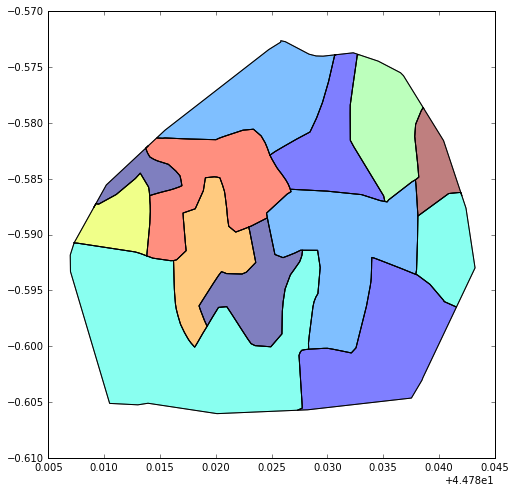

In [7]:
plt.figure(figsize=(8,8))
iris_zone_lonlat.plot()

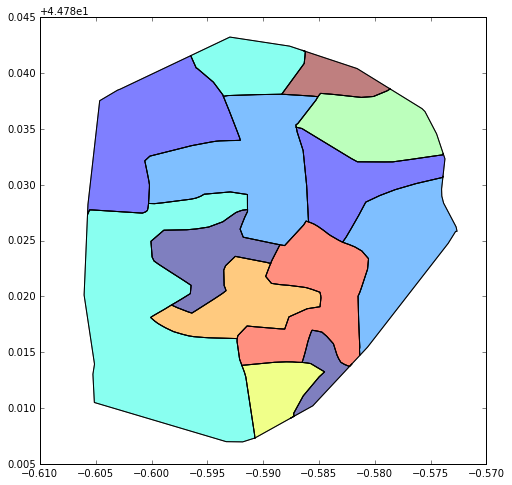

In [8]:
plt.figure(figsize=(8,8))
iris_zone_latlon.plot()

In [9]:
#talence_map = folium.Map(location=[44.80477, -0.59543], zoom_start=14)

In [10]:
#folium.GeoJson(data=iris_zone_latlon,
#               style_function = lambda x: {'fillColor': 'green', 'color': 'green','weight': 5 ,'fillOpacity':0.25}).add_to(talence_map)

In [11]:
#talence_map

In [12]:
#for index,zone in iris_centroid.iterrows():
    #print zone['centroid'].x, zone['centroid'].y
    #print zone['NOM_IRIS']
    #folium.Marker([zone['centroid'].x, zone['centroid'].y],popup = zone['NOM_IRIS'],icon=folium.Icon(color='green')).add_to(talence_map)

In [13]:
#talence_map

In [4]:
import ast
def txt_to_df(file):
    txt = [line.rstrip('\n') for line in open(file)]
    txt = ''.join(txt)
    lst = ast.literal_eval(txt)
    
    df = geopandas.GeoDataFrame(columns = ['geometry'])
    df.crs= {'init': 'epsg:4326', 'no_defs': True}
    
    for poly in lst:
        geom = Polygon(poly)
        df.loc[len(df)] = geom
        
        
    return df

In [8]:
bureau_vote_lonlat = txt_to_df('data/bdv.txt')
bureau_vote_latlon = reverse_coord(bureau_vote_lonlat)

In [10]:
bureau_vote_latlon.to_file('data/bureau_vote_latlon', driver="ESRI Shapefile") 

In [11]:
bureau_vote_latlon.head()

,geometry
0,"POLYGON ((-0.588413 44.807702, -0.586268 44.80..."
1,"POLYGON ((-0.5840919999999999 44.802496, -0.58..."
2,"POLYGON ((-0.584997 44.808468, -0.578787000000..."
3,"POLYGON ((-0.60165 44.80826, -0.594673 44.8034..."
4,"POLYGON ((-0.590767 44.82018, -0.587901 44.818..."


In [16]:
bdv_centroid = pd.DataFrame()
bdv_centroid['centroid'] = bureau_vote_lonlat.geometry.centroid
bdv_centroid.head()

,centroid
0,POINT (44.81195305984733 -0.5859840685745001)
1,POINT (44.80661008402815 -0.5836718341599018)
2,POINT (44.80985081135471 -0.5790936864639455)
3,POINT (44.81007374325603 -0.5942578703170318)
4,POINT (44.82129728012114 -0.5873934346195356)


In [17]:
bureau_vote_latlon.head()

,geometry
0,"POLYGON ((-0.588413 44.807702, -0.586268 44.80..."
1,"POLYGON ((-0.5840919999999999 44.802496, -0.58..."
2,"POLYGON ((-0.584997 44.808468, -0.578787000000..."
3,"POLYGON ((-0.60165 44.80826, -0.594673 44.8034..."
4,"POLYGON ((-0.590767 44.82018, -0.587901 44.818..."


In [18]:
bureau_vote_lonlat.head()

,geometry
0,"POLYGON ((44.807702 -0.588413, 44.807446 -0.58..."
1,"POLYGON ((44.802496 -0.5840919999999999, 44.80..."
2,"POLYGON ((44.808468 -0.584997, 44.806715 -0.57..."
3,"POLYGON ((44.80826 -0.60165, 44.803464 -0.5946..."
4,"POLYGON ((44.82018 -0.590767, 44.818651 -0.587..."


In [19]:
#folium.GeoJson(data=bureau_vote_latlon, 
               #style_function = lambda x: {'fillColor': 'red','color':'red', 'weight':2,'fillOpacity':0.3}).add_to(talence_map)

In [20]:
#for index,bdv in bdv_centroid.iterrows():
    #print bdv['centroid'].x, bdv['centroid'].y
    #folium.Marker([bdv['centroid'].x, bdv['centroid'].y], popup = str(index) , icon=folium.Icon(color='red') ).add_to(talence_map) 

In [21]:
#talence_map

In [22]:
talence_map = folium.Map(location=[44.80477, -0.59543], zoom_start=14)

In [23]:
folium.GeoJson(data=iris_zone_latlon,
               style_function = lambda x: {'fillColor': 'green', 'color': 'green','weight': 5 ,'fillOpacity':0.25}).add_to(talence_map)

In [24]:
folium.GeoJson(data=bureau_vote_latlon, 
               style_function = lambda x: {'fillColor': 'red','color':'red', 'weight':2,'fillOpacity':0.3}).add_to(talence_map)

In [25]:
for index,zone in iris_centroid.iterrows():
    #print zone['centroid'].x, zone['centroid'].y
    #print zone['NOM_IRIS']
    folium.Marker([zone['centroid'].x, zone['centroid'].y],popup = zone['NOM_IRIS'],icon=folium.Icon(color='green')).add_to(talence_map)

In [26]:
for index,bdv in bdv_centroid.iterrows():
    #print bdv['centroid'].x, bdv['centroid'].y
    folium.Marker([bdv['centroid'].x, bdv['centroid'].y], popup = str(index) , icon=folium.Icon(color='red') ).add_to(talence_map) 

In [27]:
talence_map

### Compute overlapping area

In [28]:
iris_zone_lonlat.head()

,DCOMIRIS,DEPCOM,IRIS,NOM_COM,NOM_IRIS,TYP_IRIS,geometry
0,335220112,33522,0112,Talence,Thouars 2,H,POLYGON ((44.78908756888363 -0.587543196053298...
1,335220102,33522,0102,Talence,La Fauvette,H,POLYGON ((44.81515751477936 -0.587032337621043...
2,335220108,33522,0108,Talence,Peylanne-Leysotte,H,POLYGON ((44.80485440650479 -0.582880444346136...
3,335220103,33522,0103,Talence,Combattants-Bijou,H,POLYGON ((44.78731246999818 -0.590734733544139...
4,335220105,33522,0105,Talence,Cauderes,H,POLYGON ((44.81515751477936 -0.587032337621043...


In [29]:
bureau_vote_lonlat.head()

,geometry
0,"POLYGON ((44.807702 -0.588413, 44.807446 -0.58..."
1,"POLYGON ((44.802496 -0.5840919999999999, 44.80..."
2,"POLYGON ((44.808468 -0.584997, 44.806715 -0.57..."
3,"POLYGON ((44.80826 -0.60165, 44.803464 -0.5946..."
4,"POLYGON ((44.82018 -0.590767, 44.818651 -0.587..."


In [30]:
def compute_overlap_area(iris_zone_lonlat, bureau_vote_lonlat): 
    overlap_zone = geopandas.GeoDataFrame(columns = ['bdv_id','DCOMIRIS','NOM_IRIS','geometry','overlap_percentage'])
    overlap_zone.crs = {'init':'epsg:4326', 'no_defs':True}
    for index_bdv, bdv in bureau_vote_lonlat.iterrows():
        for index_iris, iris in iris_zone_lonlat.iterrows():
            if bdv['geometry'].intersects(iris['geometry']):
                overlap_geom = bdv['geometry'].intersection(iris['geometry'])
                overlap_area = overlap_geom.area
                #print type(overlap_zone)
                overlap_zone.loc[len(overlap_zone)] = [index_bdv,
                                                       iris['DCOMIRIS'],
                                                       iris['NOM_IRIS'],
                                                       overlap_geom,
                                                       float(overlap_area)/iris['geometry'].area * 100 ]
    return overlap_zone
           

In [31]:
overlap_zone = compute_overlap_area(iris_zone_lonlat, bureau_vote_lonlat)

In [32]:
overlap_zone.head()

,bdv_id,DCOMIRIS,NOM_IRIS,geometry,overlap_percentage
0,0,335220102,La Fauvette,POLYGON ((44.8075980099622 -0.5859827927160718...,32.044260
1,0,335220105,Cauderes,POLYGON ((44.81242302107591 -0.582208663490257...,18.267020
2,0,335220101,Poste-Mairie,"POLYGON ((44.807702 -0.588413, 44.807446 -0.58...",18.729996
3,1,335220102,La Fauvette,POLYGON ((44.80847796788409 -0.580737969755348...,33.000796
4,1,335220108,Peylanne-Leysotte,POLYGON ((44.8040061123703 -0.5811023878013025...,13.938283


In [33]:
overlap_zone[overlap_zone['bdv_id']==10]

,bdv_id,DCOMIRIS,NOM_IRIS,geometry,overlap_percentage
29,10,335220102,La Fauvette,POLYGON ((44.81205382451436 -0.579848945112840...,0.952511
30,10,335220105,Cauderes,"POLYGON ((44.813408 -0.579963, 44.812053824514...",21.922897


In [34]:
overlap_zone_excel = overlap_zone.drop('geometry',1)

In [35]:
overlap_zone_excel.head()

,bdv_id,DCOMIRIS,NOM_IRIS,overlap_percentage
0,0,335220102,La Fauvette,32.044260
1,0,335220105,Cauderes,18.267020
2,0,335220101,Poste-Mairie,18.729996
3,1,335220102,La Fauvette,33.000796
4,1,335220108,Peylanne-Leysotte,13.938283


In [36]:
#writer = pd.ExcelWriter('result/overlap_zone_talence.xlsx')
#overlap_zone_excel.to_excel(writer,'Sheet1')
#writer.save()

In [37]:
#overlap_zone.to_file('result/overlap_zone_talence',driver="GeoJSON")

In [38]:
#overlap_zone.to_file('result/overlap_zone/overlap_zone_talence_shp/overlap_zone_talence', driver="ESRI Shapefile")

In [39]:
#iris_zone_lonlat.to_file('data/iris_zone_lonlat', driver = 'ESRI Shapefile')

In [40]:
#bureau_vote_lonlat.to_file('data/bureau_vote_lonlat', driver = 'ESRI Shapefile')

In [41]:
#talence_map.save('map/talence.html')